In [8]:
import numpy as np
import tensorflow
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense,SimpleRNN
import pandas as pd
from sklearn.model_selection import train_test_split
import jieba
import json
import pandas as pd
import os
import keras
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

# 斷詞

In [9]:
# # 把文章斷詞
# df1=datanews
# df1['seg']=None
# n=len(datanews)
# alltext=[]
# stopset=set()
# stop2=['/n','']


# with open('C:\\Users\\Big data\\Desktop\\字詞貼標\\DB104-master\\stop.txt','r',encoding='ISO-8859-1') as s:
#     for line in s:
#         stopset.add(line.strip('\n'))
# jieba.load_userdict('C:\\Users\\Big data\\Desktop\\字詞貼標\\DB104-master\\userdict.txt')
# for i in range(n):
#     seg=''
#     wf={}
#     text= str(df1.loc[i]['ConTain'])
#     cut=jieba.cut(text,cut_all=False)
#     for j in cut:
#         if j not in stopset:
#             seg +=j+' '
#             seg = seg.replace("\n",'')
#     df1['seg'][i]=seg
#存檔
# df1.to_excel(r"C:\Users\Big data\Desktop\class\funcardproject\斷詞與和卡額度.xls")
# df1

In [10]:
datanews = pd.read_excel(r"C:\Users\Big data\Desktop\class\funcardproject\斷詞與和卡額度.xls")
datanews[:5]

,Unnamed: 0,Unnamed: 0.1,credLimit,credLimit_group,ConTain,seg,seg分離
0,0,0,6070000,4,[職業]:科技\n[年資]:2年\n[年收]:寫2M\n[財力]:所得清單/帳戶/基金/保單...,職業 科技 年資 2 年 年收 寫 2M 財力 所得 清單 帳戶 基金 保單 原持 ...,"職業,科技,年資,2,年,年收,寫,2M,財力,所得,清單,帳戶,基金,保單,原持,卡片,持..."
1,1,1,4500000,4,[心得] 華南 享利樂活Combo Combo Life 加辦核卡時間Wed Apr 25 ...,心得 華南 享利樂活 Combo Combo Life 加辦 核卡 時間...,"心得,華南,享利樂活,Combo,Combo,Life,加辦,核卡,時間,Wed,Apr,2..."
2,2,2,2410000,4,[心得] 元大鑽金J與M - 未核時間Tue Jan 16 15:02:22 2018\n[...,心得 元大鑽金 J 與 M 未核 時間 Tue Jan 16 15 ...,"心得,元大鑽金,J,與,M,未核,時間,Tue,Jan,16,15,02,22,2018,職..."
3,3,3,2000000,4,[心得] 機場接送(範圍)貴賓室、哩程紅利現金回饋時間Sat Nov 3 23:19:34...,心得 機場 接送 範圍 貴賓室 、 哩程 紅利 現金回饋 時間 Sat Nov ...,"心得,機場,接送,範圍,貴賓室,、,哩程,紅利,現金回饋,時間,Sat,Nov,3,23,1..."
4,4,4,1500000,4,[心得] 中信.玉山.台新.花旗.富邦.國泰多家調額時間Sun Sep 1 19:18:2...,心得 中信 玉山 台新 花旗 富邦 國泰 多家 調額 時間 Sun Sep ...,"心得,中信,玉山,台新,花旗,富邦,國泰,多家,調額,時間,Sun,Sep,1,19,18,..."


In [11]:
# 分成訓練測試
train_data, test_data, train_targets, test_targets = train_test_split(datanews.loc[:, ["seg分離"]] , datanews.loc[:, ["credLimit_group"]] , test_size=0.3,)


In [12]:
max_features = 1000 #最常用的1000個單字
maxlen = 100 #只用每篇文章的後20字
from keras.layers import Embedding
from keras import preprocessing
embedding_layer = Embedding(1000,64)


In [13]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=64)# 建立1000維向量
#訓練資料
tokenizer.fit_on_texts(train_data["seg分離"])
sequences_train = tokenizer.texts_to_sequences (train_data["seg分離"])
train_data = tokenizer.texts_to_matrix(train_data["seg分離"],mode='binary')
#測試資料
tokenizer.fit_on_texts(test_data["seg分離"])
sequences_test = tokenizer.texts_to_sequences (test_data["seg分離"])
test_data = tokenizer.texts_to_matrix(test_data["seg分離"],mode='binary')
# #訓練標籤
# tokenizer.fit_on_texts(train_targets["credLimit_group"])
# sequences_test = tokenizer.texts_to_sequences (train_targets["credLimit_group"])
# test_data = tokenizer.texts_to_matrix(train_targets["credLimit_group"],mode='binary')
# #測試標籤
# tokenizer.fit_on_texts(test_targets["credLimit_group"])
# sequences_test = tokenizer.texts_to_sequences (test_targets["credLimit_group"])
# test_data = tokenizer.texts_to_matrix(test_targets["credLimit_group"],mode='binary')

In [14]:
train_targets=np.array(train_targets,dtype=np.int)
test_targets=np.array(test_targets,dtype=np.int)

In [15]:
#標籤to one hot
def to_one_hot(labels, dimension=5):
    results = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label]=1.
    return results
train_targets = to_one_hot(train_targets)
test_targets = to_one_hot(test_targets)

In [16]:
x_train = preprocessing.sequence.pad_sequences(sequences_train,maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(sequences_test,maxlen=maxlen)

In [17]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Embedding

In [19]:
model = Sequential()
model.add(Embedding(10000,8,input_length = maxlen))

model.add(Flatten())model.add(Dense(5,activation='softmax'))
model.compile(optimizer = 'rmsprop',loss ='categorical_crossentropy',metrics = ['acc'])
model.summary()



SyntaxError: invalid syntax (<ipython-input-19-c83076adb626>, line 4)

In [160]:
history = model.fit(x_train,train_targets,
                   epochs = 20,
                   batch_size=8,
                   validation_data=(x_test,test_targets))

Train on 1427 samples, validate on 612 samples
Epoch 1/20
   8/1427 [..............................] - ETA: 7s - loss: 1.6385 - acc: 0.1250

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


1427/1427 [==============================] - 0s 185us/step - loss: 1.5555 - acc: 0.3055 - val_loss: 1.5312 - val_acc: 0.3023
Epoch 2/20
1427/1427 [==============================] - 0s 142us/step - loss: 1.5169 - acc: 0.3308 - val_loss: 1.5403 - val_acc: 0.3137
Epoch 3/20
1427/1427 [==============================] - 0s 143us/step - loss: 1.4816 - acc: 0.3623 - val_loss: 1.5329 - val_acc: 0.2990
Epoch 4/20
1427/1427 [==============================] - 0s 143us/step - loss: 1.4301 - acc: 0.4015 - val_loss: 1.5459 - val_acc: 0.2892
Epoch 5/20
1427/1427 [==============================] - 0s 145us/step - loss: 1.3634 - acc: 0.4604 - val_loss: 1.5489 - val_acc: 0.3072
Epoch 6/20
1427/1427 [==============================] - 0s 137us/step - loss: 1.2838 - acc: 0.5214 - val_loss: 1.5645 - val_acc: 0.2908
Epoch 7/20
1427/1427 [==============================] - 0s 143us/step - loss: 1.1985 - acc: 0.5753 - val_loss: 1.5875 - val_acc: 0.2663
Epoch 8/20
1427/1427 [==============================] - 0s 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35347 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32244 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33287 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39511 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35657 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30340 missing from c

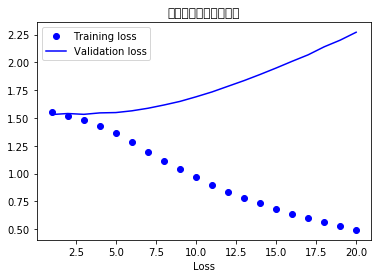

In [161]:

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+ 1)
plt.plot(epochs, loss,'bo',label='Training loss')
plt.plot(epochs, val_loss,'b',label='Validation loss')
plt.title('訓練與驗證的損失函數')
plt.xlabel('Epohs')
plt.xlabel('Loss')
plt.legend()
plt.show()

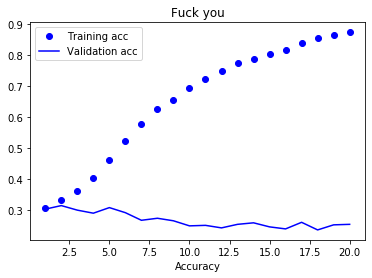

In [162]:
plt.clf()
acc = history.history['acc']
val_acc=history.history['val_acc']

plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title('Fuck you')
plt.xlabel('Epohs')
plt.xlabel('Accuracy')
plt.legend()
plt.show()

In [163]:
x_train

array([[ 0,  0,  0, ...,  4,  2, 19],
       [ 0,  0,  0, ...,  5, 15, 30],
       [54,  6, 30, ...,  2, 63,  1],
       ...,
       [ 0,  0,  0, ...,  1, 50,  2],
       [54,  6,  3, ...,  3,  8,  1],
       [ 0,  0,  0, ..., 52, 62,  8]])